In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('per-capita-energy-use.csv')

In [3]:
data.head()

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [4]:
data.shape

(8961, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               8961 non-null   object 
 1   Code                                 8796 non-null   object 
 2   Year                                 8961 non-null   int64  
 3   Energy consumption per capita (kWh)  8961 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 280.2+ KB


In [6]:
data.describe()

,Year,Energy consumption per capita (kWh)
count,8961.000000,8.961000e+03
mean,1995.877581,2.983376e+04
std,13.544539,7.549302e+04
min,1965.000000,0.000000e+00
25%,1986.000000,3.249927e+03
50%,1997.000000,1.407556e+04
75%,2007.000000,3.695648e+04
max,2019.000000,1.676610e+06


In [7]:
data.isnull().sum()

Entity                                   0
Code                                   165
Year                                     0
Energy consumption per capita (kWh)      0
dtype: int64

In [8]:
countries = data['Entity'].unique()

In [9]:
countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Europe', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 'French Guiana', 

In [10]:
len(countries)

215

In [11]:
data['Entity'].value_counts()

Sri Lanka      55
China          55
Italy          55
Norway         55
Japan          55
               ..
Eritrea        23
Palestine      20
Timor          14
Montenegro     11
South Sudan     5
Name: Entity, Length: 215, dtype: int64

In [12]:
UK_energy_consumption = data[data['Entity']=='United Kingdom']
US_energy_consumption = data[data['Entity']=='United States']
China_energy_consumption = data[data['Entity']=='China']
India_energy_consumption = data[data['Entity']=='India']

[Text(0.5, 1.0, 'China')]

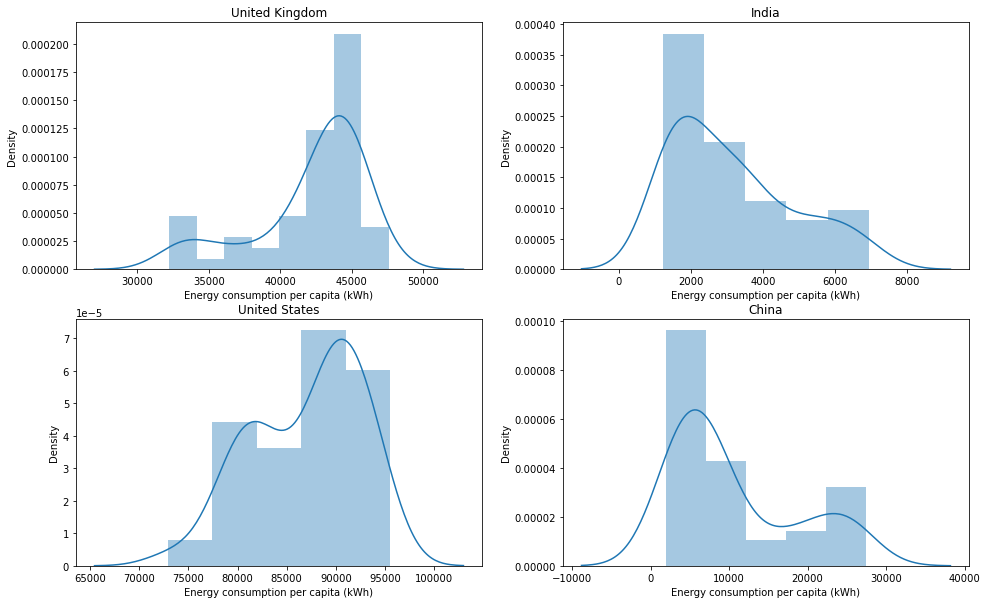

In [18]:
# Distribution Plots
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(UK_energy_consumption['Energy consumption per capita (kWh)']).set(title='United Kingdom')
plt.subplot(2,2,2)
sns.distplot(India_energy_consumption['Energy consumption per capita (kWh)']).set(title='India')
plt.subplot(2,2,3)
sns.distplot(US_energy_consumption['Energy consumption per capita (kWh)']).set(title='United States')
plt.subplot(2,2,4)
sns.distplot(China_energy_consumption['Energy consumption per capita (kWh)']).set(title='China')

In [14]:
# Here the distributions are skewed. So we use IQR method
# If the distributions were nearly normal, we use Z-score treatment method

[Text(0.5, 1.0, 'China')]

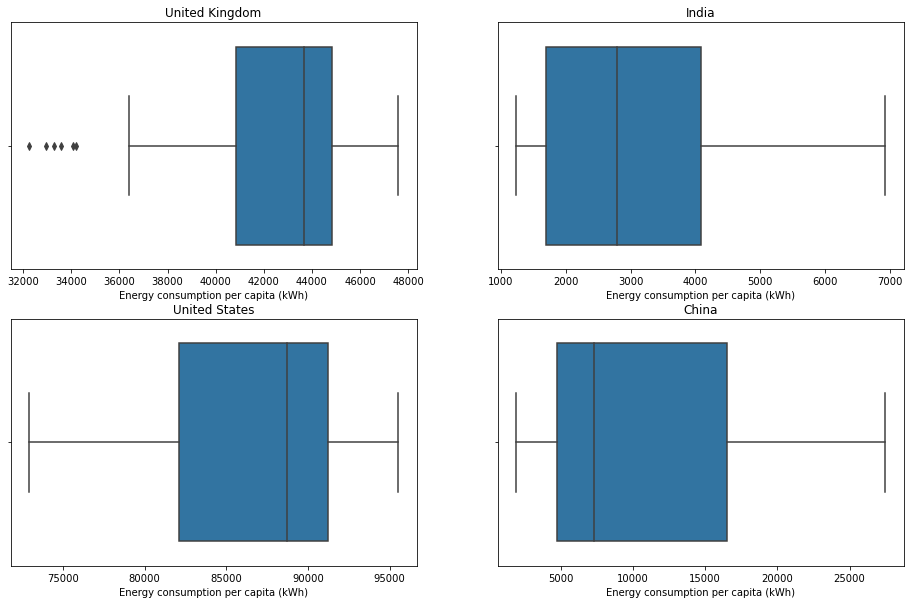

In [17]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(UK_energy_consumption['Energy consumption per capita (kWh)']).set(title='United Kingdom')
plt.subplot(2,2,2)
sns.boxplot(India_energy_consumption['Energy consumption per capita (kWh)']).set(title='India')
plt.subplot(2,2,3)
sns.boxplot(US_energy_consumption['Energy consumption per capita (kWh)']).set(title='United States')
plt.subplot(2,2,4)
sns.boxplot(China_energy_consumption['Energy consumption per capita (kWh)']).set(title='China')

In [20]:
# Possible outliers in UK data

In [21]:
# Finding IQR
percentile25 = UK_energy_consumption['Energy consumption per capita (kWh)'].quantile(0.25)
percentile75 = UK_energy_consumption['Energy consumption per capita (kWh)'].quantile(0.75)
iqr = percentile75-percentile25

In [22]:
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
# Finding Outliers
# UK_energy_consumption[UK_energy_consumption['Energy consumption per capita (kWh)'] > upper_limit]
UK_energy_consumption[UK_energy_consumption['Energy consumption per capita (kWh)'] < lower_limit]

,Entity,Code,Year,Energy consumption per capita (kWh)
8441,United Kingdom,GBR,2014,34054.030367
8442,United Kingdom,GBR,2015,34208.031238
8443,United Kingdom,GBR,2016,33577.337402
8444,United Kingdom,GBR,2017,33267.134123
8445,United Kingdom,GBR,2018,32950.188272
8446,United Kingdom,GBR,2019,32249.734559


In [30]:
UK_energy_consumption.shape

(55, 4)

In [36]:
# Trimming and making new UK data
UK_energy_consumption_trim = UK_energy_consumption[UK_energy_consumption['Energy consumption per capita (kWh)'] > lower_limit]

In [37]:
UK_energy_consumption_trim.shape

(49, 4)

[Text(0.5, 1.0, 'United Kingdom')]

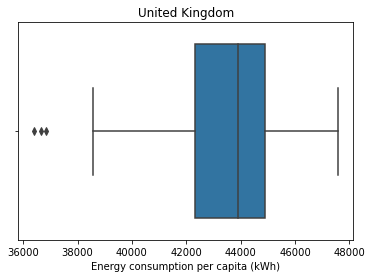

In [38]:
sns.boxplot(UK_energy_consumption_trim['Energy consumption per capita (kWh)']).set(title='United Kingdom')

In [39]:
# Capping and making new UK data
UK_energy_consumption_cap = UK_energy_consumption.copy()
UK_energy_consumption_cap['Energy consumption per capita (kWh)'] = np.where(
    UK_energy_consumption_cap['Energy consumption per capita (kWh)'] > upper_limit,
    upper_limit,
    np.where(
        UK_energy_consumption_cap['Energy consumption per capita (kWh)'] < lower_limit,
        lower_limit,
        UK_energy_consumption_cap['Energy consumption per capita (kWh)']
    )
)

<AxesSubplot:xlabel='Energy consumption per capita (kWh)'>

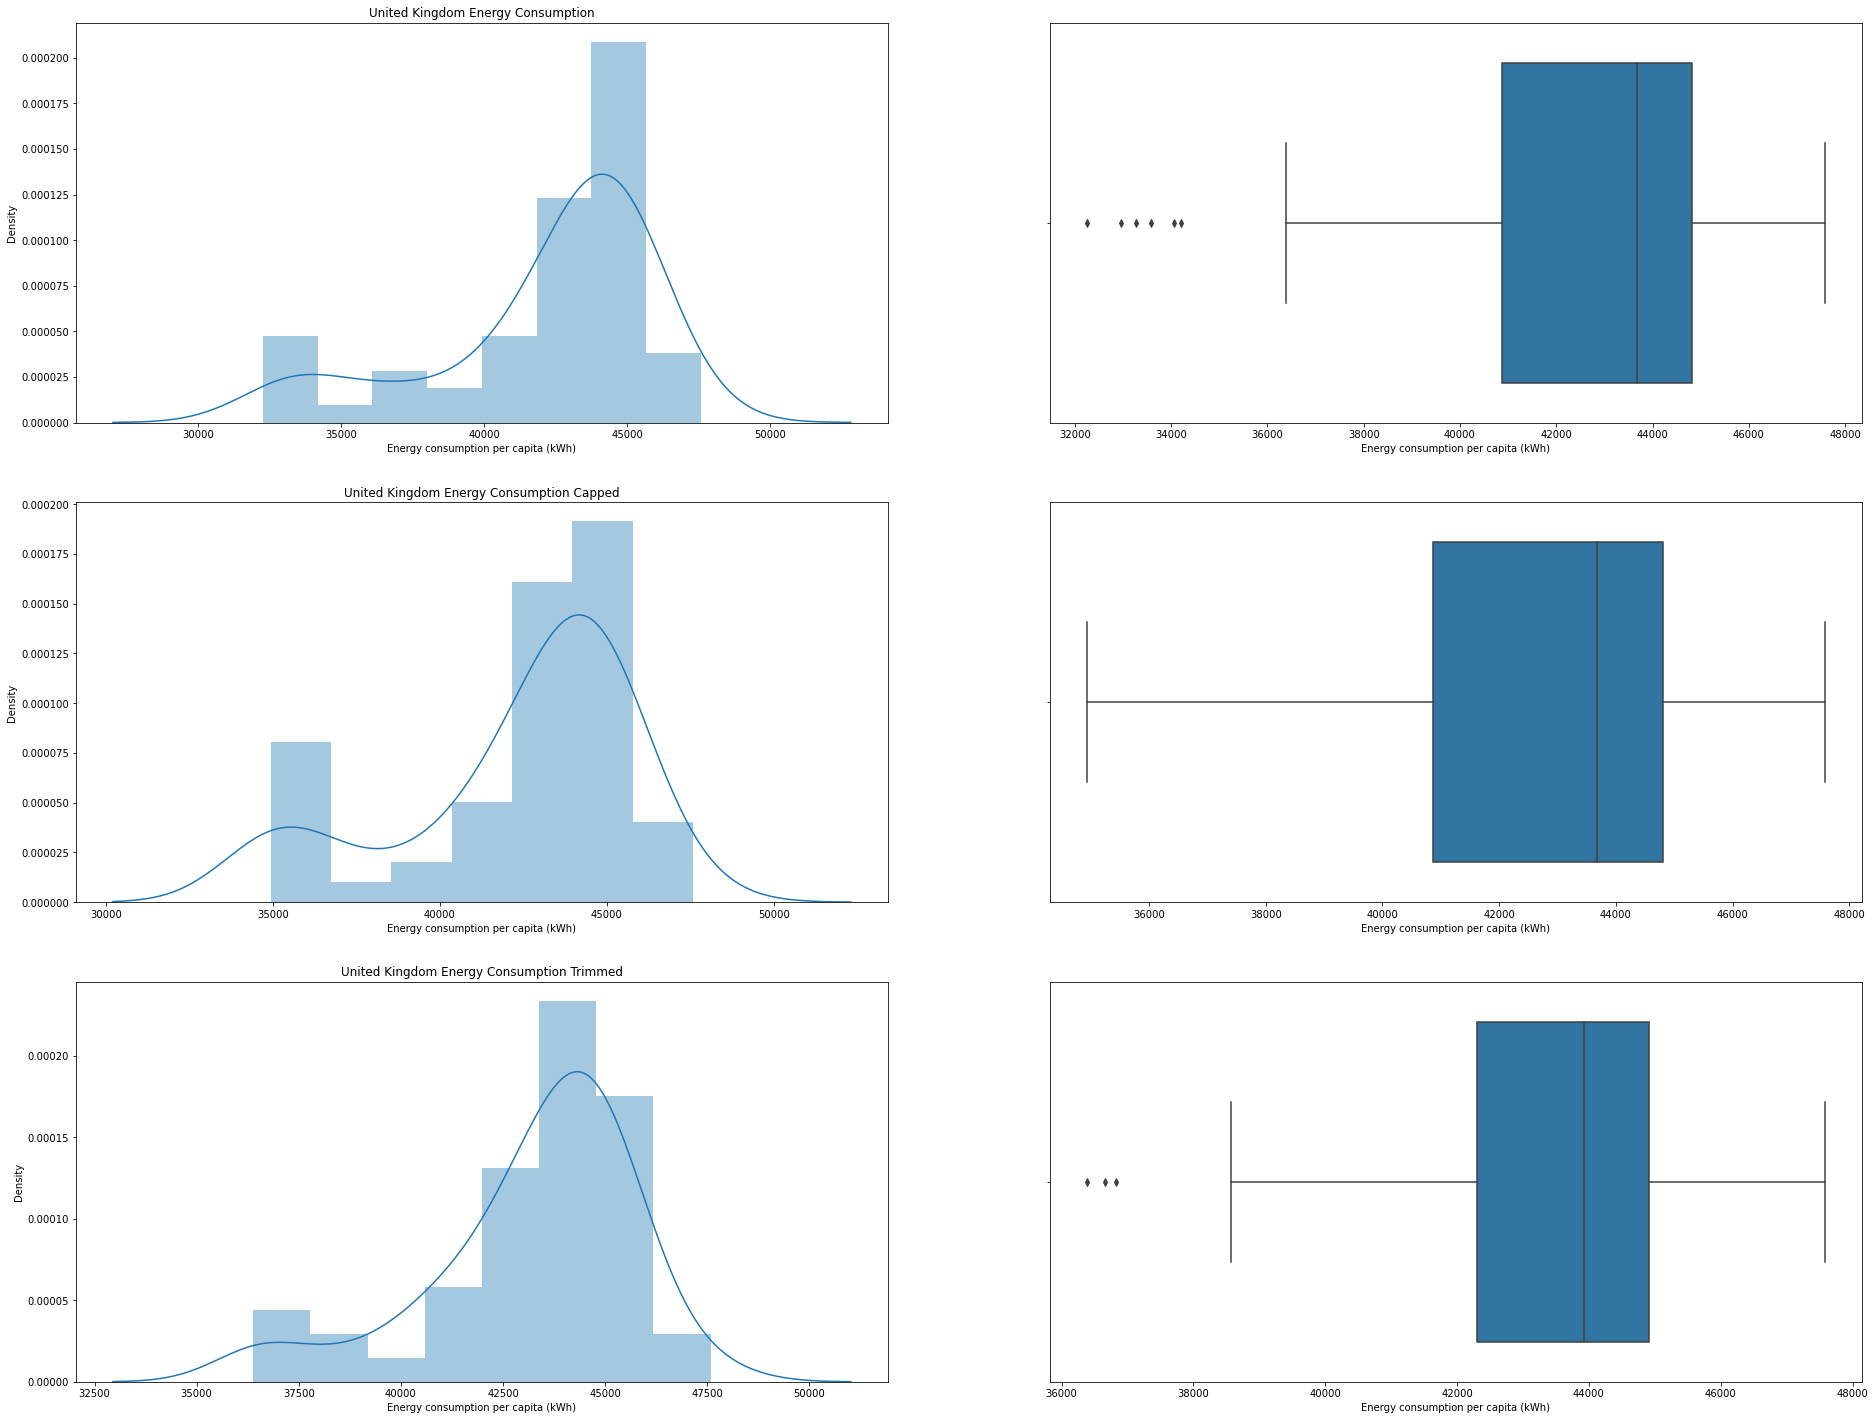

In [44]:
plt.figure(figsize=(32,25))
plt.subplot(3,2,1)
sns.distplot(UK_energy_consumption['Energy consumption per capita (kWh)'])
plt.title('United Kingdom Energy Consumption')
plt.subplot(3,2,2)
sns.boxplot(UK_energy_consumption['Energy consumption per capita (kWh)'])
plt.subplot(3,2,3)
sns.distplot(UK_energy_consumption_cap['Energy consumption per capita (kWh)'])
plt.title('United Kingdom Energy Consumption Capped')
plt.subplot(3,2,4)
sns.boxplot(UK_energy_consumption_cap['Energy consumption per capita (kWh)'])
plt.subplot(3,2,5)
sns.distplot(UK_energy_consumption_trim['Energy consumption per capita (kWh)'])
plt.title('United Kingdom Energy Consumption Trimmed')
plt.subplot(3,2,6)
sns.boxplot(UK_energy_consumption_trim['Energy consumption per capita (kWh)'])

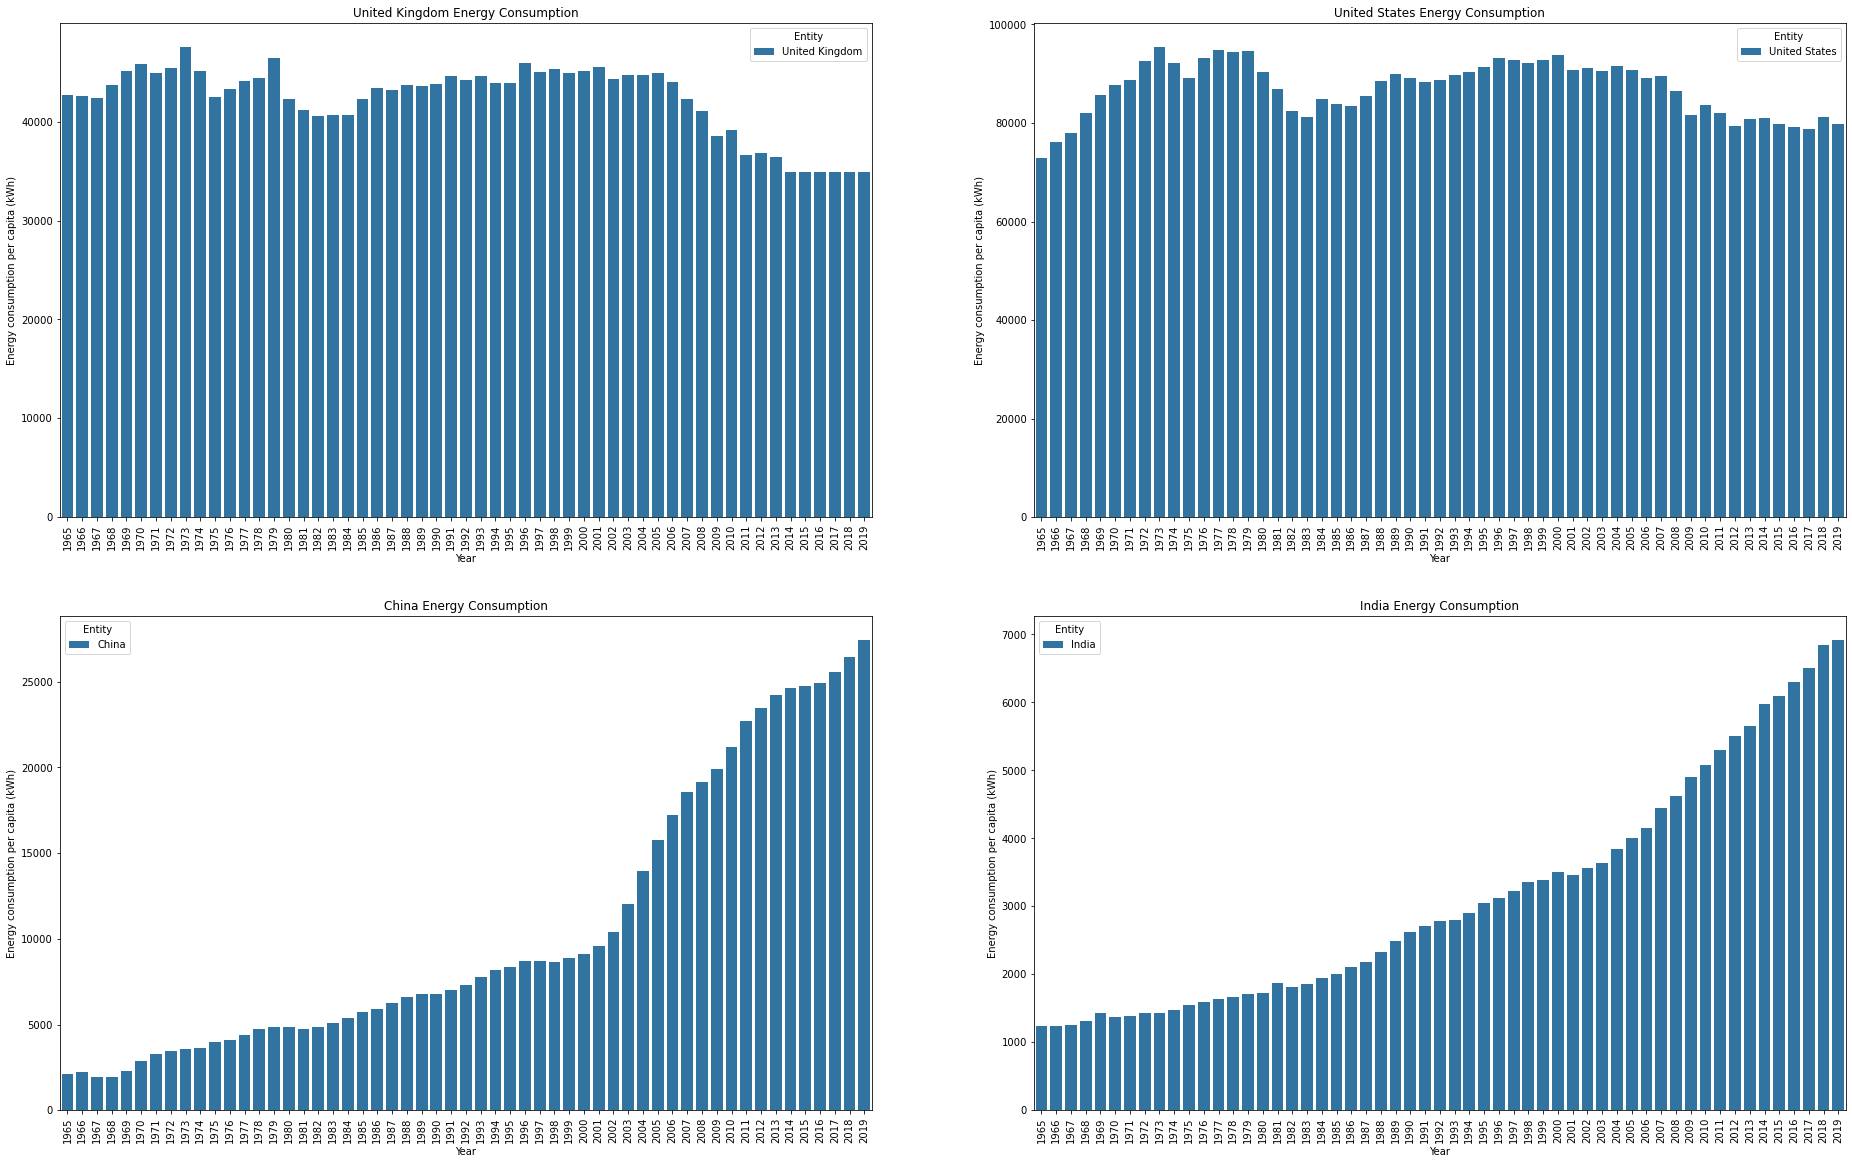

In [45]:
plt.figure(figsize = (32,20))
plt.subplot(2,2,1)
sns.barplot(x = 'Year',
           y = 'Energy consumption per capita (kWh)',
           hue = 'Entity',
           data = UK_energy_consumption_cap)
plt.xticks(rotation = 90)
plt.title('United Kingdom Energy Consumption')
plt.subplot(2,2,2)
sns.barplot(x = 'Year',
           y = 'Energy consumption per capita (kWh)',
           hue = 'Entity',
           data = US_energy_consumption)
plt.xticks(rotation = 90)
plt.title('United States Energy Consumption')
plt.subplot(2,2,3)
sns.barplot(x = 'Year',
           y = 'Energy consumption per capita (kWh)',
           hue = 'Entity',
           data = China_energy_consumption)
plt.xticks(rotation = 90)
plt.title('China Energy Consumption')
plt.subplot(2,2,4)
sns.barplot(x = 'Year',
           y = 'Energy consumption per capita (kWh)',
           hue = 'Entity',
           data = India_energy_consumption)
plt.xticks(rotation = 90)
plt.title('India Energy Consumption')
plt.show()

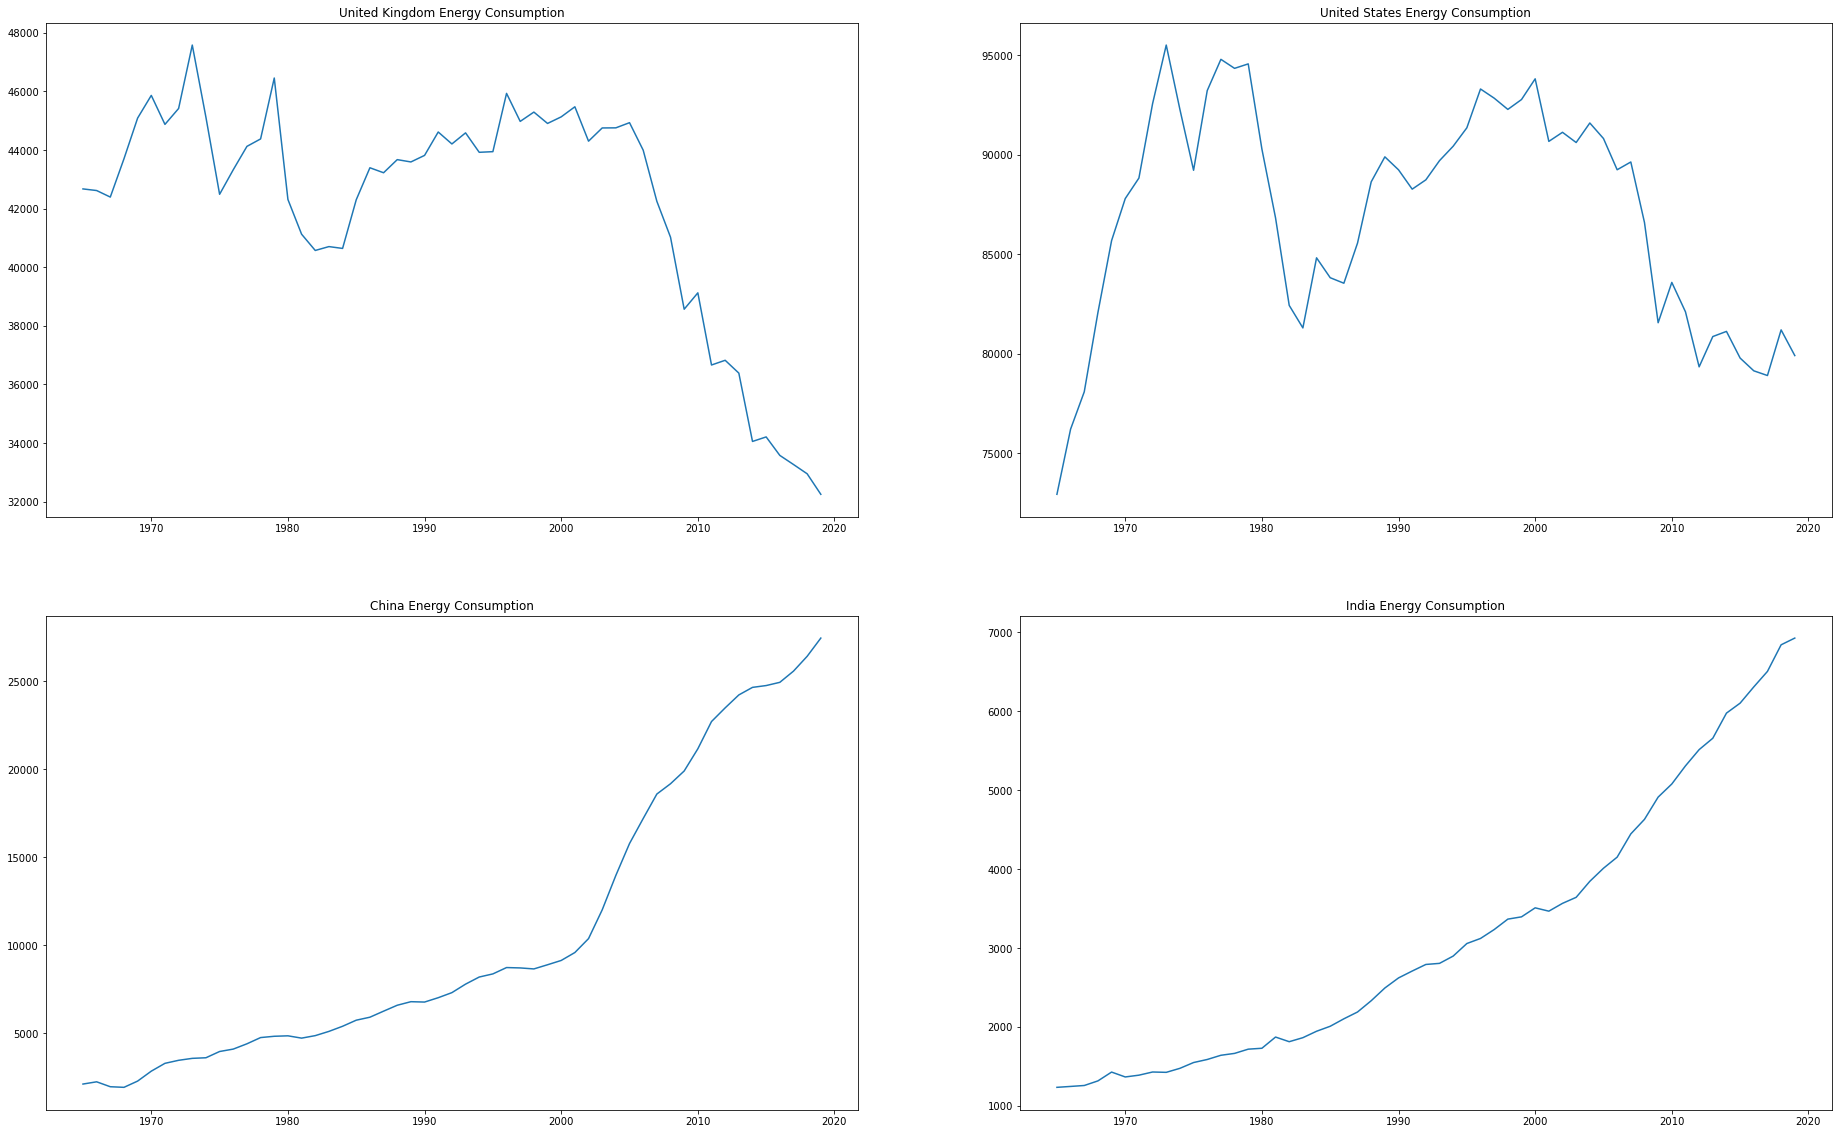

In [88]:
plt.figure(figsize = (32,20))
plt.subplot(2,2,1)
plt.plot(data['Year'][data['Entity']=='United Kingdom'],
data['Energy consumption per capita (kWh)'][data['Entity']=='United Kingdom'])
plt.title('United Kingdom Energy Consumption')

plt.subplot(2,2,2)
plt.plot(data['Year'][data['Entity']=='United States'],
data['Energy consumption per capita (kWh)'][data['Entity']=='United States'])
plt.title('United States Energy Consumption')

plt.subplot(2,2,3)
plt.plot(data['Year'][data['Entity']=='China'],
data['Energy consumption per capita (kWh)'][data['Entity']=='China'])
plt.title('China Energy Consumption')

plt.subplot(2,2,4)
plt.plot(data['Year'][data['Entity']=='India'],
data['Energy consumption per capita (kWh)'][data['Entity']=='India'])
plt.title('India Energy Consumption')
plt.show()

In [46]:
# DROPPING UNNECESSARY COLUMNS AND CREATING EXPLANATORY VARIABLE & RESPONSE VARIABLE
x = UK_energy_consumption.drop(['Energy consumption per capita (kWh)', 'Entity', 'Code'], axis=1)
y = UK_energy_consumption['Energy consumption per capita (kWh)']

In [47]:
xn = UK_energy_consumption_cap.drop(['Energy consumption per capita (kWh)', 'Entity', 'Code'], axis=1)
yn = UK_energy_consumption_cap['Energy consumption per capita (kWh)']

In [48]:
x.shape

(55, 1)

In [49]:
y.head()

8392    42670.597097
8393    42615.425610
8394    42392.514529
8395    43697.871528
8396    45087.578212
Name: Energy consumption per capita (kWh), dtype: float64

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.2)

In [51]:
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(xn, yn, test_size =0.2)

In [52]:
model_uk = LinearRegression()
model_uk.fit(x,y)

LinearRegression()

In [53]:
model_ukn = LinearRegression()
model_ukn.fit(xn,yn)

LinearRegression()

In [54]:
print('Coefficient: ', model_uk.coef_)
print('Intercept: ', model_uk.intercept_)
pre = model_uk.predict(x)

Coefficient:  [-151.64149631]
Intercept:  344219.8271553921


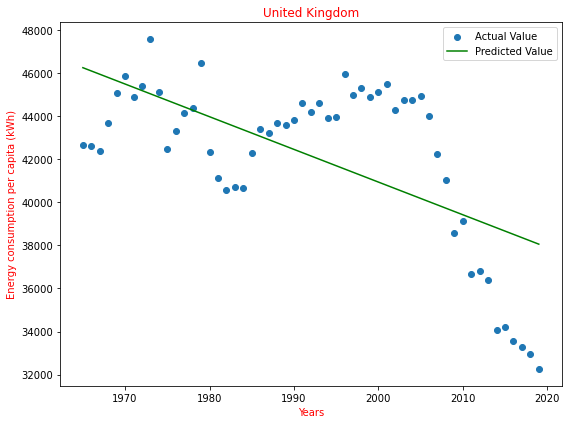

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label='Actual Value')
plt.plot(x,pre,color='g', label='Predicted Value')
plt.legend()
plt.title('United Kingdom', color='r')
plt.xlabel('Years', color='r')
plt.ylabel('Energy consumption per capita (kWh)', color='r')
plt.tight_layout()
plt.show()

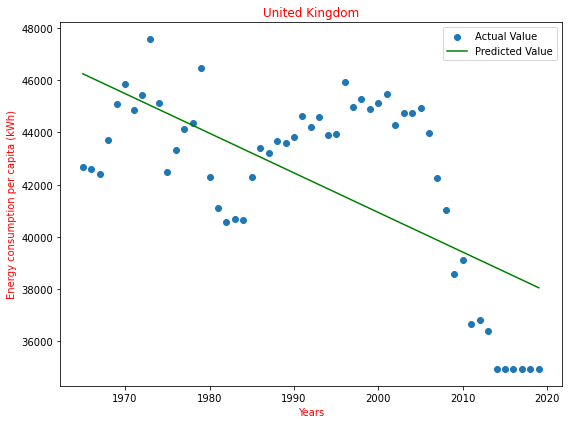

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(xn,yn,label='Actual Value')
plt.plot(xn,pre,color='g', label='Predicted Value')
plt.legend()
plt.title('United Kingdom', color='r')
plt.xlabel('Years', color='r')
plt.ylabel('Energy consumption per capita (kWh)', color='r')
plt.tight_layout()
plt.show()

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
years=[2021, 2022, 2023, 2024, 2025]
for i in years:
    print(model_uk.predict([[i]]))

[37752.36310296]
[37600.72160665]
[37449.08011033]
[37297.43861402]
[37145.7971177]


In [58]:
years=[2021, 2022, 2023, 2024, 2025]
for i in years:
    print(model_ukn.predict([[i]]))

[38412.89810358]
[38278.19400549]
[38143.48990741]
[38008.78580933]
[37874.08171125]


In [59]:
from sklearn.metrics import mean_squared_error

In [64]:
print('By function: ', mean_squared_error(y,model_uk.predict(x),squared=False))

By function:  3014.6130580133627


In [65]:
print('By function: ', mean_squared_error(y,model_ukn.predict(x),squared=False))

By function:  3031.3139198592594


In [62]:
# Test & Training Accuracy
print('Test Accuracy Score: ', model_uk.score(X_test, Y_test))
print('Train Accuracy Score: ', model_uk.score(X_train, Y_train))

Test Accuracy Score:  0.4987898147758023
Train Accuracy Score:  0.3452974979984781


In [63]:
# Test & Training Accuracy
print('Test Accuracy Score: ', model_ukn.score(X_test, Y_test))
print('Train Accuracy Score: ', model_ukn.score(X_train, Y_train))

Test Accuracy Score:  0.4681822033980557
Train Accuracy Score:  0.3476127732885894


In [68]:
x = India_energy_consumption.drop(['Energy consumption per capita (kWh)', 'Entity', 'Code'], axis=1)
y = India_energy_consumption['Energy consumption per capita (kWh)']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.2)

In [70]:
model_in = LinearRegression()
model_in.fit(x,y)

LinearRegression()

In [71]:
print('Coefficient: ', model_in.coef_)
print('Intercept: ', model_in.intercept_)
pre = model_in.predict(x)

Coefficient:  [100.88809531]
Intercept:  -197834.57228195635


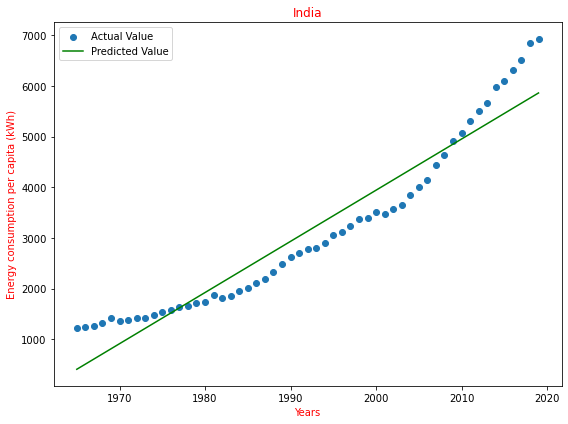

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label='Actual Value')
plt.plot(x,pre,color='g', label='Predicted Value')
plt.legend()
plt.title('India', color='r')
plt.xlabel('Years', color='r')
plt.ylabel('Energy consumption per capita (kWh)', color='r')
plt.tight_layout()
plt.show()

In [73]:
for i in years:
    print(model_in.predict([[i]]))

[6060.26833817]
[6161.15643348]
[6262.04452879]
[6362.9326241]
[6463.82071941]


In [74]:
# Test & Training Accuracy
print('Test Accuracy Score: ', model_in.score(X_test, Y_test))
print('Train Accuracy Score: ', model_in.score(X_train, Y_train))

Test Accuracy Score:  0.9379848156516909
Train Accuracy Score:  0.9157310800318653


In [76]:
print('By function: ', mean_squared_error(y,model_in.predict(x)))

By function:  224472.17786638133


In [77]:
x = US_energy_consumption.drop(['Energy consumption per capita (kWh)', 'Entity', 'Code'], axis=1)
y = US_energy_consumption['Energy consumption per capita (kWh)']

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.2)

In [79]:
model_us = LinearRegression()
model_us.fit(x,y)

LinearRegression()

In [80]:
print('Coefficient: ', model_us.coef_)
print('Intercept: ', model_us.intercept_)
pre = model_us.predict(x)

Coefficient:  [-58.62123908]
Intercept:  203780.57815972238


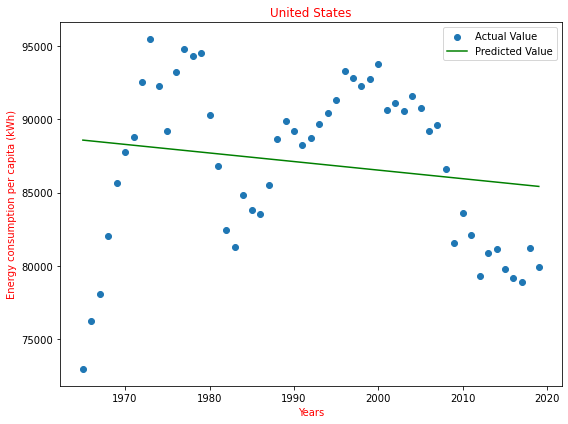

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label='Actual Value')
plt.plot(x,pre,color='g', label='Predicted Value')
plt.legend()
plt.title('United States', color='r')
plt.xlabel('Years', color='r')
plt.ylabel('Energy consumption per capita (kWh)', color='r')
plt.tight_layout()
plt.show()

In [82]:
for i in years:
    print(model_us.predict([[i]]))

[85307.05397468]
[85248.4327356]
[85189.81149652]
[85131.19025743]
[85072.56901835]


In [83]:
# Test & Training Accuracy
print('Test Accuracy Score: ', model_us.score(X_test, Y_test))
print('Train Accuracy Score: ', model_us.score(X_train, Y_train))

Test Accuracy Score:  0.11925825925555045
Train Accuracy Score:  0.01545864214260051


In [84]:
x = China_energy_consumption.drop(['Energy consumption per capita (kWh)', 'Entity', 'Code'], axis=1)
y = China_energy_consumption['Energy consumption per capita (kWh)']

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.2)

In [87]:
model_ch = LinearRegression()
model_ch.fit(x,y)

LinearRegression()

In [88]:
print('Coefficient: ', model_ch.coef_)
print('Intercept: ', model_ch.intercept_)
pre = model_ch.predict(x)

Coefficient:  [461.41932466]
Intercept:  -908652.4702005195


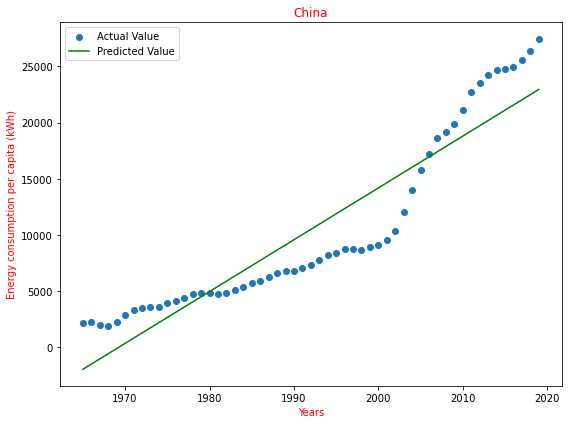

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label='Actual Value')
plt.plot(x,pre,color='g', label='Predicted Value')
plt.legend()
plt.title('China', color='r')
plt.xlabel('Years', color='r')
plt.ylabel('Energy consumption per capita (kWh)', color='r')
plt.tight_layout()
plt.show()

In [91]:
for i in years:
    print(model_ch.predict([[i]]))

[23875.98493793]
[24337.40426259]
[24798.82358725]
[25260.24291191]
[25721.66223657]


In [92]:
# Test & Training Accuracy
print('Test Accuracy Score: ', model_ch.score(X_test, Y_test))
print('Train Accuracy Score: ', model_ch.score(X_train, Y_train))

Test Accuracy Score:  0.8599543024647708
Train Accuracy Score:  0.8583085772322538


In [93]:
print('By function: ', mean_squared_error(y,model_ch.predict(x)))

By function:  8542014.46367537


In [96]:
model_ch.predict([[2025]])

array([25721.66223657])